## Identifying Types of Players to Target for Future Data Collection

## Intro

## Methods & Results

We started by importing libraries for later steps as well as setting the seed to reproduce the data
for future uses. The last line of code specifies the maximum amount of lines to show if a dataset
is printed to increase readability throughout the code.


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(275)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Importing and Reading the Data Files in R

Then we importanted the data into the workbook.

In [2]:
player_data <- read.csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
player_data


session_data <- read.csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")
session_data

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Tidying Data and wrangling session data into player data

The data was tidied by making an extra row in the player dataset named counter and it counted
how many times each user logged in to play Minecraft. We counted how many times each player
logged in through their hashed ID and joined the row to the player data. We also factored the
experience column so R would read it as a categorical variable and removed the two N/A
columns in addition to any users that had N/A values for the new counter variable.


In [3]:
tidy_player_data <- select(player_data,-individualId, -organizationName) |>
    mutate(experience = as_factor(experience))
tidy_player_data

tidy_session_data <- session_data
tidy_session_data


experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
login_counter <- session_data |>
  group_by(hashedEmail) |>
  summarise(counter = n())
login_counter

tidy_counter_data <- tidy_player_data |>
    left_join(login_counter, by = "hashedEmail") |>
    na.omit()
    

hashedEmail,counter
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


## Determining Optimal Neighbours

Then we split the tidy player data into a training and testing set through the factored experience variable. We chose 90% of the data for a training set because 125 rows are not that many and we prioritized a better training set over a larger testing set. 

In [5]:
player_split <- initial_split(tidy_counter_data, prop = 0.90, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)


## Creating VFolds and Plot for Optimal Neighbours

We created a workflow to test different numbers of neighbours to find the highest accuracy
in a range of odd numbers from 1-7. We didn't consider higher numbers because the data
and training set was so small which should be a consideration in finding the optimal neighbours,
so numbers higher than 7 did not make much sense to include. Then we created a workflow and
graphed the output to find the highest point which was our optimal neighbours.


→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2554451,5,0.03368730,Preprocessor1_Model1
1,roc_auc,hand_till,0.5219345,5,0.02337378,Preprocessor1_Model1
3,accuracy,multiclass,0.2641408,5,0.02582490,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,roc_auc,hand_till,0.5528429,5,0.02261914,Preprocessor1_Model3
7,accuracy,multiclass,0.2462733,5,0.01901524,Preprocessor1_Model4
7,roc_auc,hand_till,0.5419848,5,0.01904598,Preprocessor1_Model4


[1] 3

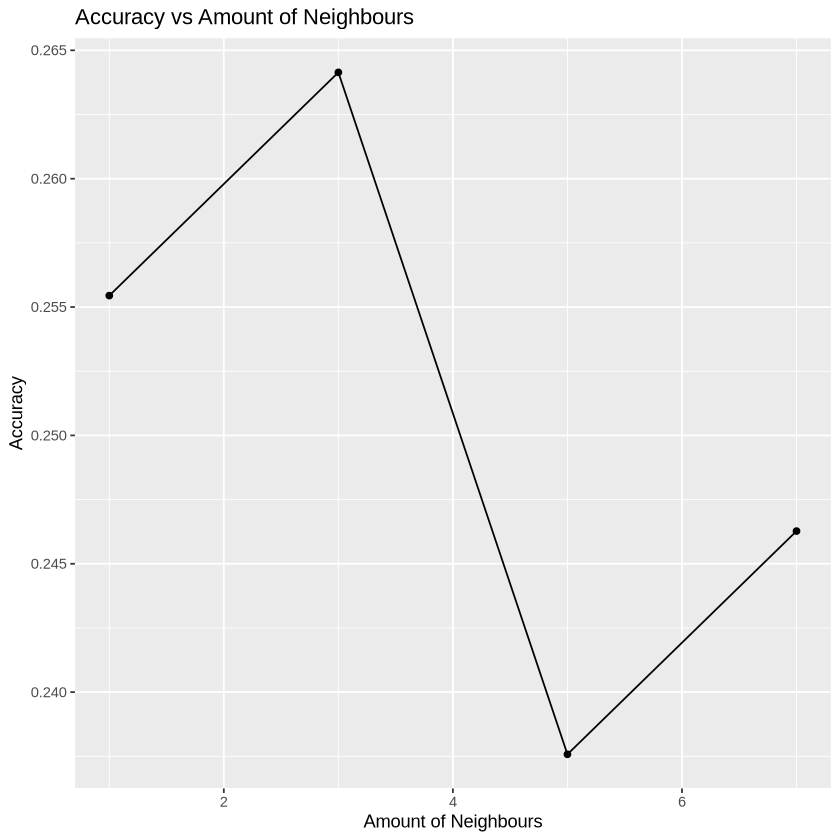

In [6]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_recipe <- recipe(experience ~ played_hours + counter, data = player_training) |>
  step_scale(all_predictors())|>
    step_center(all_predictors())

knn_vfold <- vfold_cv(player_training, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 7, by = 2))

knn_results <- workflow() |>
       add_recipe(player_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = knn_vfold, grid = k_vals) |>
       collect_metrics()
knn_results

filtered_results <- filter(knn_results, .metric == "accuracy")

cross_val_plot <- ggplot(filtered_results, aes(y = mean, x=neighbors))+
                geom_point()    +
                geom_line() +
    labs( x= "Amount of Neighbours", y= "Accuracy", title= "Accuracy vs Amount of Neighbours")
cross_val_plot

neighbours_optimal <- arrange(filtered_results, -mean) |>
select(neighbors)|>
    slice(1)|>
    pull()
neighbours_optimal

## Performing Final Classification With Optimal Neighbours

After finding the optimal number, we ran the workflow again with the new information and found our model's accuracy on the testing set. 

In [7]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =neighbours_optimal)|>
    set_engine("kknn")|>
    set_mode("classification")

player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = player_training)

player_fit

predictions <- player_fit |>
  predict(player_training) |>
  bind_cols(player_training)

player_metrics <- predictions |>
  metrics(truth = experience, estimate = .pred_class)
player_metrics

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.7454545
Best kernel: rectangular
Best k: 3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5454545
kap,multiclass,0.3836154


## Testing Model

In [19]:
test_set_metrics <- predict(player_fit, player_testing)|>
    bind_cols(player_testing)|>
    metrics(truth= experience, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.26666667
kap,multiclass,-0.01851852


## Finding Optimal Players Using Hypothetical Dataset 

Finally, we created a dataset of different combinations of users with high played_hours and counters then predicted the class of each user in the best player dataset. Then we counted each level of experience and finally found which expereience was predicted the most for these best players to answer our question of which player type to target. 

In [27]:
best_players <- tibble(played_hours =c(150,202,300,190,100,250, 300), counter=c(200,240,30,70,250,100,300))
best_players

predicted_best<- predict(player_fit, best_players)|>
    bind_cols(best_players)

best_cat <- predicted_best |>
    group_by(.pred_class) |>
    summarize(most = n()) |>
    arrange(desc(most)) |>
    slice(1) |>
    pull(.pred_class)
best_cat

played_hours,counter
<dbl>,<dbl>
150,200
202,240
300,30
⋮,⋮
100,250
250,100
300,300


[1] Regular
Levels: Pro Veteran Amateur Regular Beginner

### Analysis Visualization

We graphed the findings in a scatterplot by joining the two datasets and sorting colour by the expereince level for the actual data or predicted expereinces for the predicted data. Then we used colour to seperate the different experience types and shape for the real or predicted data to confirm and visually show the output of the model. 

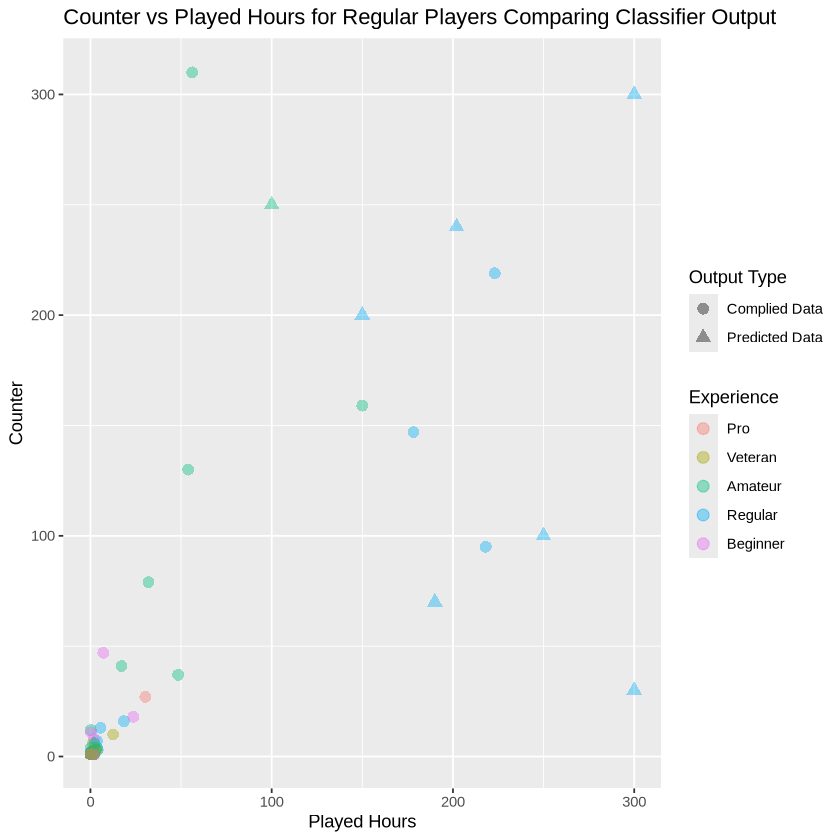

In [28]:
player_training <- tidy_counter_data |>
  mutate(type = "Complied Data")

predicted_best <- predicted_best |>
  mutate(type = "Predicted Data",
         experience = .pred_class)

combined_data <- bind_rows(player_training, predicted_best)

ggplot(combined_data, aes(x = played_hours, y = counter)) +
  geom_point(alpha = 0.4, size =3, aes(color = experience, shape = type)) + 
  labs(
    title = "Counter vs Played Hours for Regular Players Comparing Classifier Output",
    x = "Played Hours",
    y = "Counter",
    color = "Experience",
    shape = "Output Type"
  )


## Discussion 